In [161]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.model_selection import train_test_split
from skimage import data, color, feature
from skimage.feature import hog
import glob

In [162]:
def load_data(coin, category):
    label = []
    arr = []
    path = "C:/Users/ravit/Desktop/Dataset-1/Dataset_1/" + category + "/" + coin + "/*"
    for file_ in glob.glob(path):
      img = cv2.imread(file_)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      arr.append(img)
      label.append(coin)
    return arr, label

In [163]:
def assign_data(mode):
    
  firstpiece_data, firstpiece_label = load_data('Bishop', mode)
  secondpiece_data, secondpiece_label = load_data('Pawn', mode)
    
  data = np.concatenate((firstpiece_data, secondpiece_data))
  labels = np.concatenate((firstpiece_label, secondpiece_label))
  return data, labels

In [164]:
data_train, labels_train = assign_data('Train')
data_test, labels_test = assign_data('Test')

In [165]:
data_train.shape, labels_train.shape

((9999, 224, 224, 3), (9999,))

In [166]:
 def preprocessing(arr):
    arr_prep = []
    for i in range(arr.shape[0]):
        img = cv2.cvtColor(arr[i], cv2.COLOR_BGR2GRAY)
        img = resize(img, (72, 72), anti_aliasing = True)
        arr_prep.append(img)
    return arr_prep

In [167]:
preprocessed_data_train = np.array(preprocessing(data_train))
preprocessed_data_test = np.array(preprocessing(data_test))
preprocessed_data_train.shape

(9999, 72, 72)

In [168]:
nsamples, nx, ny = preprocessed_data_train.shape
d2_train_dataset = preprocessed_data_train.reshape((nsamples,nx*ny))

In [169]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [170]:
svc = svm.SVC(C=1.0, gamma=0.001, kernel='poly', probability=True)

In [171]:
svc.fit(d2_train_dataset,labels_train)

SVC(gamma=0.001, kernel='poly', probability=True)

In [172]:
train_score = accuracy_score(labels_train, svc.predict(d2_train_dataset))

In [173]:
nsamples, nx, ny = preprocessed_data_test.shape
d2_test_dataset = preprocessed_data_test.reshape((nsamples,nx*ny))

In [174]:
test_score = accuracy_score(labels_test, svc.predict(d2_test_dataset))

In [175]:
print("SVM Train score = ", str(train_score * 100)[:5] + " %")
print("SVM Test score = ", str(test_score * 100)[:5] + " %")

SVM Train score =  100.0 %
SVM Test score =  100.0 %


In [176]:
def showImg(img_list, name_list):
    #fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(30,20))
    figure = plt.figure(figsize=(10,10))

    for i in range(0,2):
        figure.add_subplot(1,2,i+1)
        plt.title("Test Image ", y = 0.95, fontsize = 14)
        plt.imshow(img_list[i])
        plt.text(0.10,0.05,"Ouput Predicted = {}".format(name_list[i]), bbox = {'facecolor':'w','pad':5}, ha = "left", va = "top", transform = plt.gca().transAxes, fontsize = 12 )
        plt.axis("off")

In [177]:
len(labels_test)

2940

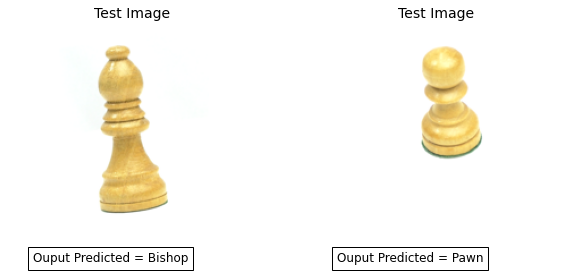

In [178]:
img_list = [data_test[77], data_test[2088]] 
name_list = [svc.predict(d2_test_dataset)[77], svc.predict(d2_test_dataset)[2388]]
showImg(img_list,name_list)